In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


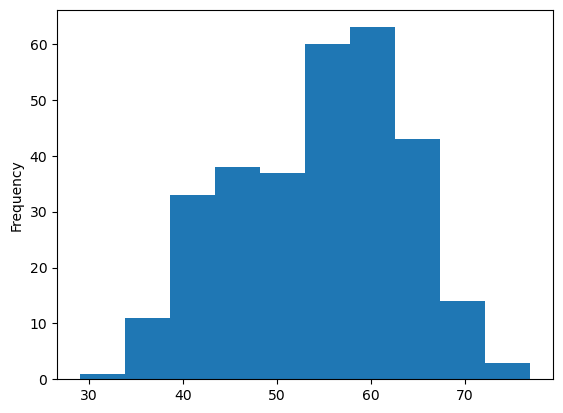

In [3]:
# Create a histrogram of age
heart_disease["age"].plot.hist();

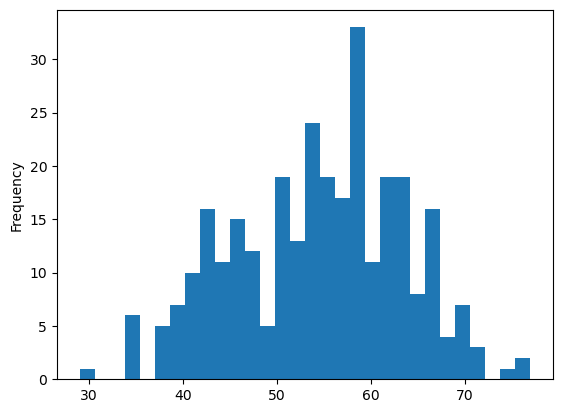

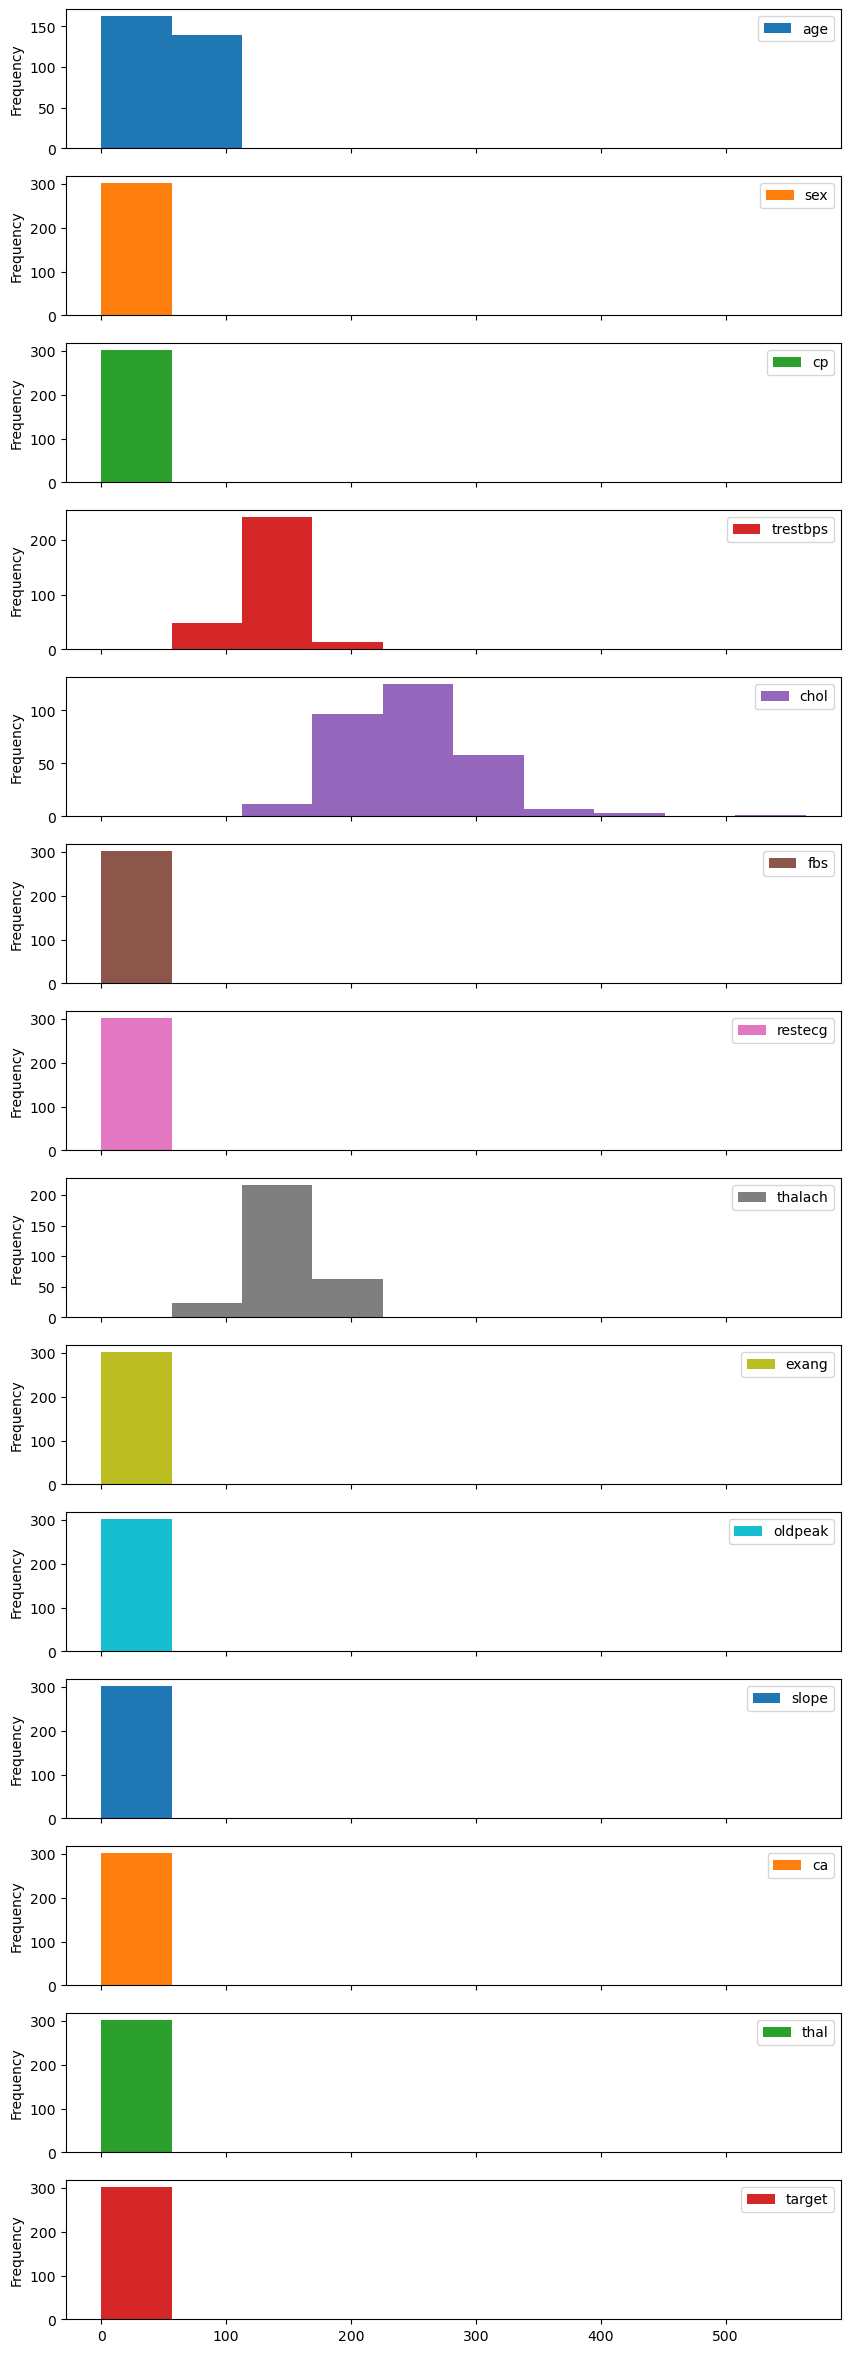

In [4]:
heart_disease["age"].plot.hist(bins=30);
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

In [5]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [6]:
 over_50 = heart_disease[heart_disease["age"] > 50]
len(over_50)

208

In [7]:
over_50.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<Axes: xlabel='age', ylabel='chol'>

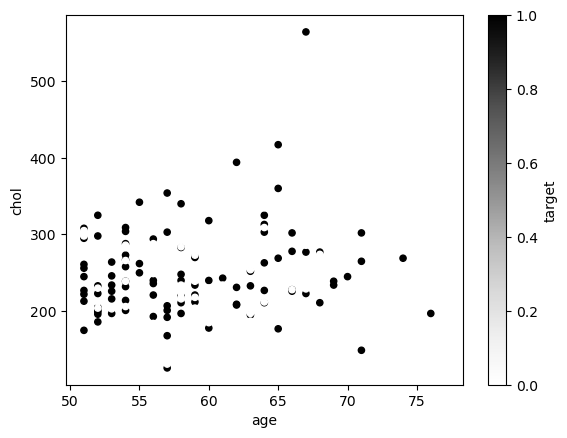

In [8]:
over_50.plot(kind='scatter',
                x="age",
                y="chol",
                c="target")

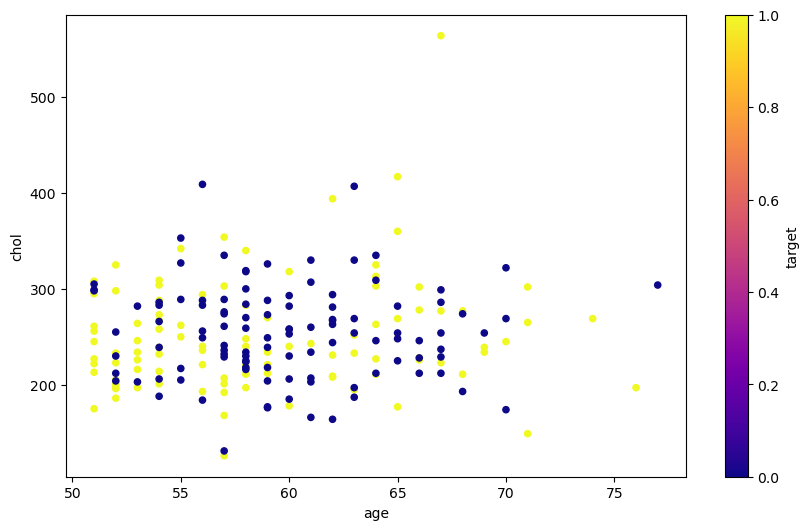

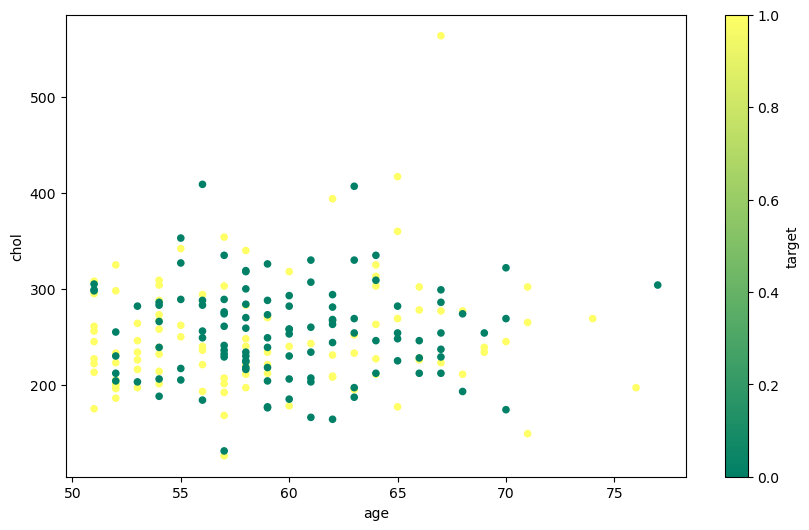

In [9]:
# oo Method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
                x="age",
                y="chol",
                c="target",
                cmap="plasma",
                ax=ax);
#  ax.set_xlim([45, 100]);

# oo Method
fix, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
                x="age",
                y="chol",
                c="target",
                cmap="summer",
                ax=ax);
#  ax.set_xlim([45, 100]);

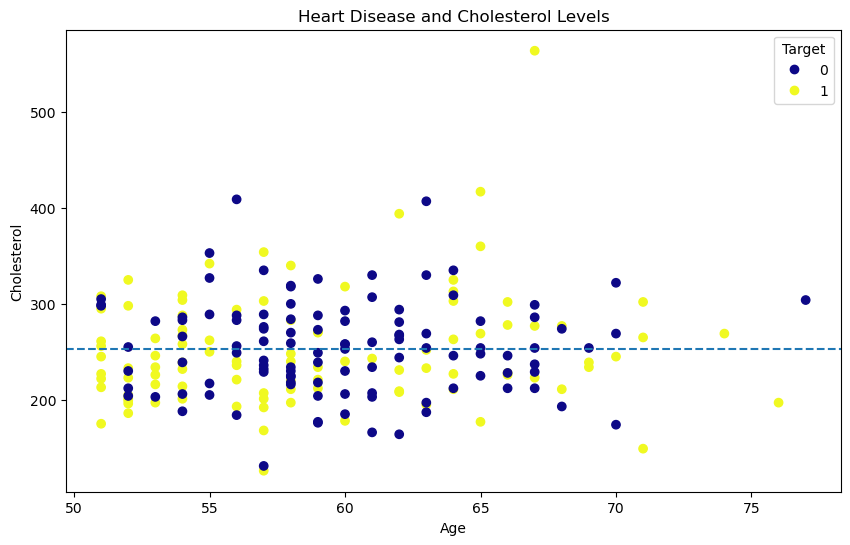

In [10]:
## oo Method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap='plasma');

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
            linestyle="--");

This plot show some information about the heart disease dataset...

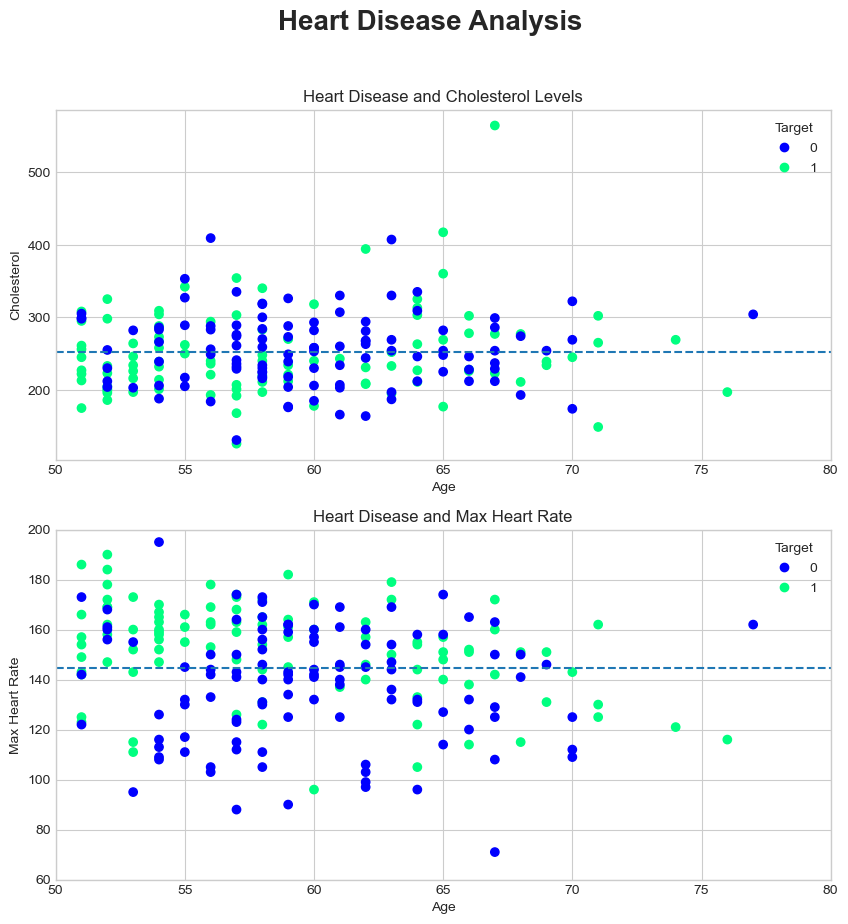

In [20]:
# Subplot of chol, age, thalash 
fig, (ax0, ax1) = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(10, 10))
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                       cmap='winter')    
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
         xlabel="Age",  
         ylabel="Cholesterol")
# Change  the X axis limits
ax0.set_xlim([50, 80])
# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                      cmap='winter')
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
         xlabel="Age",
         ylabel="Max Heart Rate")
# Change ax1 X axis limits
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])
# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")
# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=20, fontweight="bold");

C:\Users\Bulala\AppData\Local\Temp\ipykernel_10708\1031476760.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


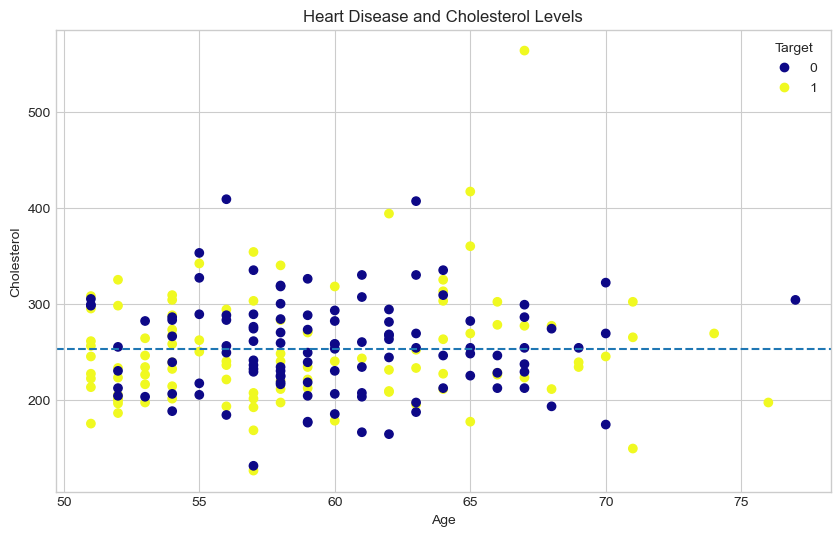

In [12]:
# Set the style
plt.style.use('seaborn-whitegrid')

## oo Method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap='plasma');

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
        xlabel="Age",
        ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
            linestyle="--");

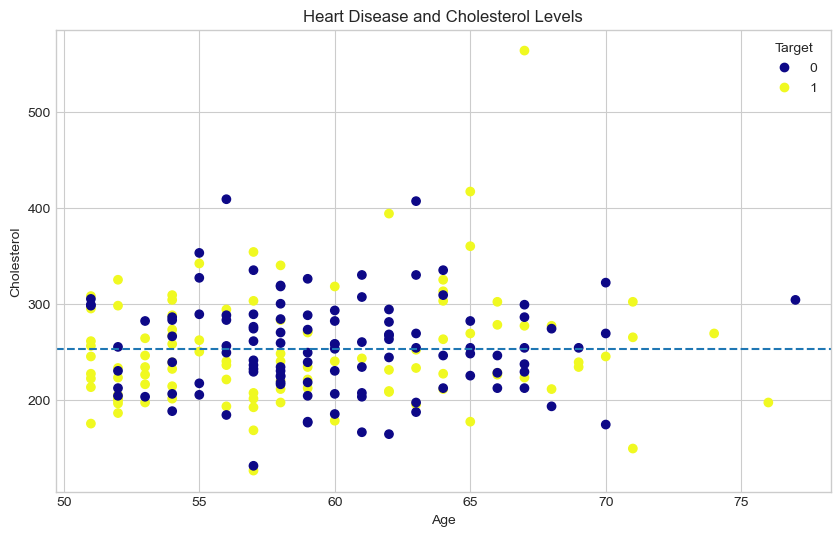

In [13]:
fig

In [14]:
fig.savefig("Heart-Disease-Analysis-Plot-saved-with-code.png")

In [15]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
heart_disease['chol'] = le.fit_transform(heart_disease['chol'])

#Separate training features from target
X_train = heart_disease.drop(['chol'], axis=1)
y_train = heart_disease['chol']

print(y_train)

0       64
1       80
2       35
3       67
4      145
      ... 
298     71
299     93
300     26
301      1
302     67
Name: chol, Length: 303, dtype: int64
